In [1]:
import numpy as np
import scipy as sp
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

import nashpy as nash

### Nash均衡を求める

In [2]:
A = np.array([[7, 4],[5, 6]])
B = np.array([[3, 6],[5, 4]])
mixed_strat = nash.Game(A,B)

# 玉子とお肉の戦略のNash均衡を求める
equili = mixed_strat.support_enumeration()
for sol in equili:
    print(sol)

(array([0.25, 0.75]), array([0.5, 0.5]))


Aのお店がお肉を選ぶ確率が1/4, Bのお店がお肉を選ぶ確率が1/2のときに、Nash均衡となる

In [3]:
p = q = np.arange(0, 1, 0.01)
P, Q = np.meshgrid(p, q)
nashp, nashq = 1/4, 1/2

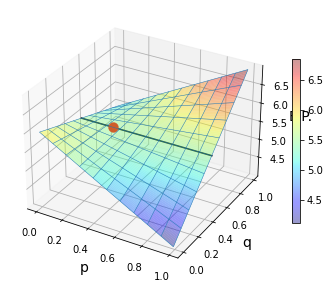

In [4]:
def funMua(p, q):
#    return 4*p*q - 2*p - q + 6
    return (p*(4*q - 2) - q + 6)

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection' : '3d'})
#fig = plt.figure(figsize=(6,6))
#ax = fig.add_subplot(projection='3d')

surface = ax.plot_surface(P, Q, funMua(P, Q), rstride=1, cstride=10, cmap='jet', alpha=0.4)
fig.colorbar(surface, ax=ax, shrink=0.5)

ax.plot_wireframe(P, Q, funMua(P,Q), rstride=10, cstride=10, linewidth=0.5)

q_tmp = np.full(p.size, nashq) # for drawing the line at nash q as Best response
ax.plot(p, q_tmp, funMua(p, q_tmp), "-", color='k', ms=1, mew=1)

ax.plot([nashp], [nashq], [funMua(nashp,nashq)], 'o', color='r', ms=10, mew=0.3)


ax.set_xlabel('p', size=14)
ax.set_ylabel('q', size=14)
ax.set_zlabel('E.P.', size=14)
#plt.savefig('fig_GT_MixedStrategy_Mua.pdf', bbox_inches='tight')
plt.show()

(p,q)= 0.1 0.2  mua, mub: 5.68 4.32 |  Est. mua, mub: 5.675 4.325
(p,q)= 0.25 0.2  mua, mub: 5.5 4.5 |  Est. mua, mub: 5.535 4.465
(p,q)= 0.4 0.2  mua, mub: 5.32 4.68 |  Est. mua, mub: 5.329 4.671
(p,q)= 0.8 0.2  mua, mub: 4.84 5.16 |  Est. mua, mub: 4.859 5.141


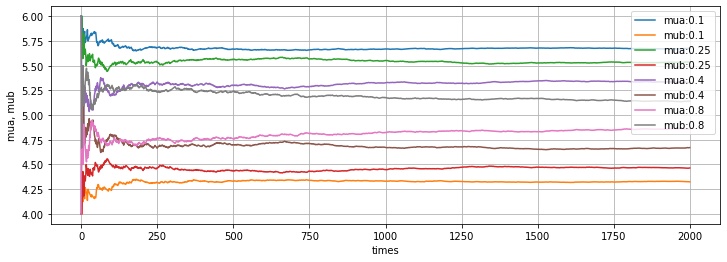

In [5]:
def funMub(p, q):
    return -4*p*q + 2*p + q + 4

np.random.seed(333)
N = 2000
arr_a, arr_b = np.zeros((2,N))

PayOff = np.array([[[7, 3],[4, 6]],[[5, 5],[6, 4]]])
fig = plt.subplots(figsize=(12,4))
plt.xlabel('times')
plt.ylabel('mua, mub')
plt.grid()

#q = nashq
q = 0.2

for p in [0.1, 0.25, 0.4, 0.8]:
    mua, mub = 0, 0
    for k in range(N):
        i = bernoulli.rvs(1-p)
        j = bernoulli.rvs(1-q)
        ga, gb = PayOff[i, j]
#    print(i, pa, pb, ':', ga, gb)
        mua += ga
        mub += gb
        arr_a[k] = mua/(k+1)
        arr_b[k] = mub/(k+1)

    print('(p,q)=',p,q,' mua, mub:', funMua(p,q), funMub(p,q), '|  Est. mua, mub:',mua/N, mub/N)

    plt.plot(arr_a, label='mua:'+str(p))
    plt.plot(arr_b, label='mub:'+str(p))
    plt.legend(loc='upper right')

plt.show()

混合戦略のp, qの組み合わせにより, 試行回数を増やすことで期待利得は収束する

-> 利得行列の平均値に収束するのはなぜ？


### じゃんけんゲーム

In [6]:
A = np.array([[0, 1, -1], [-1, 0, 1], [1, -1, 0]])
B = - A
rps = nash.Game(A, B)
eqs = rps.support_enumeration()
for sol in eqs:
    print(sol)

(array([0.33333333, 0.33333333, 0.33333333]), array([0.33333333, 0.33333333, 0.33333333]))


ナッシュ均衡は3つの手数を平等に出すこと

In [7]:
PayOff = np.array([ [[0, 0],[1, -1],[-1, 1]], [[-1, 1],[0, 0],[1, -1]], [[1, -1],[-1, 1],[0, 0]] ])

In [8]:
np.random.seed(123)

# めっちゃパー出す人:A vs 均等に出す人:B
p1, p2, p3 = 0.1, 0.1, 0.8
q1, q2, q3 = 1/3, 1/3, 1/3

N = 20
arr_pA, arr_pB = np.zeros((2,N))
arr_muA, arr_muB = np.zeros((2,N))

i_table=[0, 1, 2]
s_table=['G', 'C', 'P']

# 期待勝率と期待利得の初期化
pA, pB = 0, 0 
muA, muB = 0, 0 

for i in range(N):
    ia = np.random.choice(i_table, p=[p1, p2, p3])
    ib = np.random.choice(i_table, p=[q1, q2, q3])
    A = s_table[ia] ; B = s_table[ib]
    if A==B:
        pass
    elif A=='G' and B=='C':
        pA += 1
    elif A=='G' and B=='P':
        pB += 1
    elif A=='C' and B=='G':
        pB += 1
    elif A=='C' and B=='P':
        pA += 1
    elif A=='P' and B=='G':
        pA += 1
    else:
        pB += 1
    
    ga, gb = PayOff[ia, ib]
    muA += ga ; muB += gb
    arr_pA[i]  = pA/(i+1)  ; arr_pB[i] = pB/(i+1)
    arr_muA[i] = muA/(i+1) ; arr_muB[i] = muB/(i+1)
    

pA= 0.3  pB= 0.45
muA= -0.15  muB= 0.15


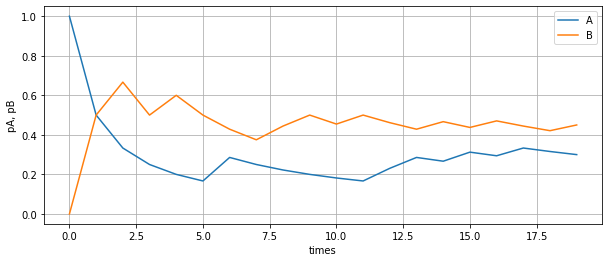

In [9]:
print('pA=',pA/N,' pB=', pB/N)
print('muA=',muA/N, ' muB=',muB/N)


fig = plt.subplots(figsize=(10,4))
plt.plot(arr_pA, label='A')
plt.plot(arr_pB, label='B')
plt.xlabel('times')
plt.ylabel('pA, pB')
plt.grid()
plt.legend()
#plt.savefig('fig_GT_RPS_ProbWing_01.pdf', bbox_inches='tight')
plt.show()

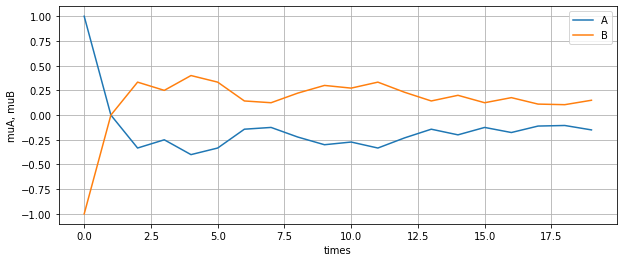

In [10]:
fig = plt.subplots(figsize=(10,4))
plt.plot(arr_muA, label='A')
plt.plot(arr_muB, label='B')
plt.xlabel('times')
plt.ylabel('muA, muB')
plt.grid()
plt.legend()
#plt.savefig('fig_GT_RPS_ExpectedPayOff_01.pdf', bbox_inches='tight')
plt.show()